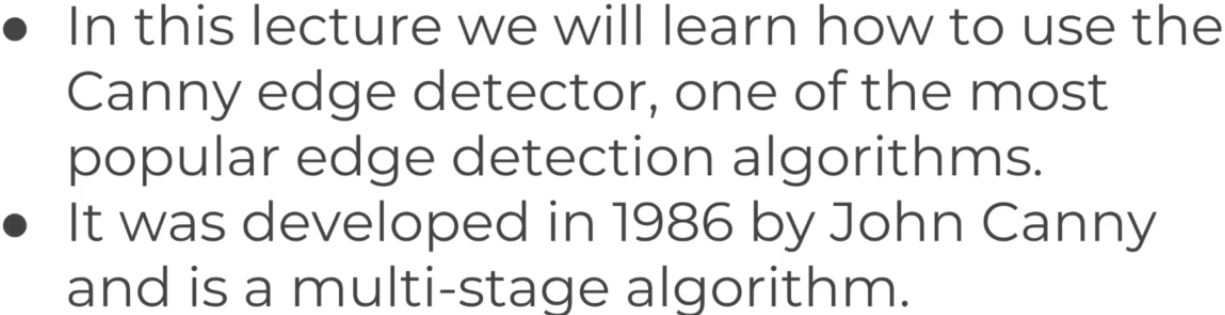

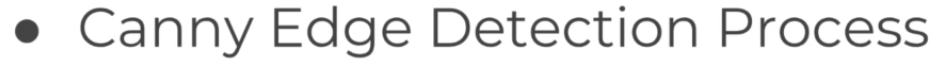

### <center> 1st Step <center/>

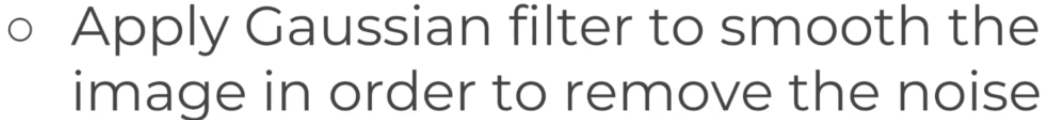
* We must apply gaussian blur or other noise reduction methods to reduce noise before canny algorithm applies its own..
* Noise in an image cause algorithm to detect too many edges.

### <center> 2nd Step <center/>

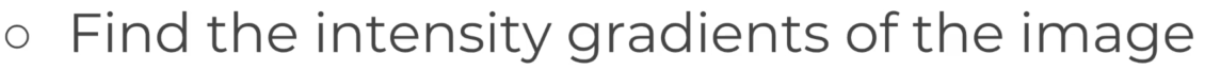

### <center> 3rd Step <center/>

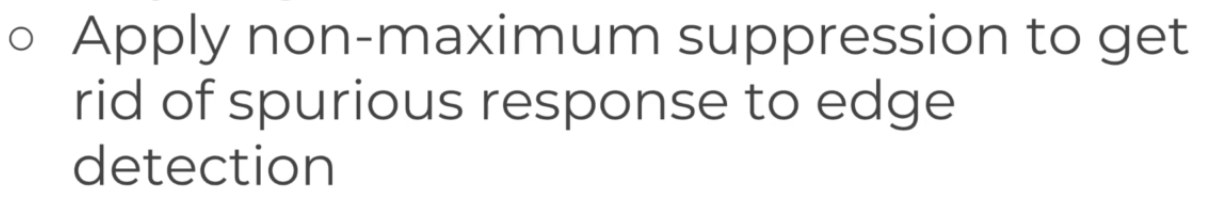

### <center> 4th Step <center/>

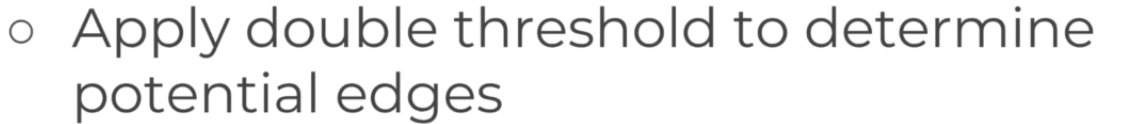

### <center> 5th Step <center/>

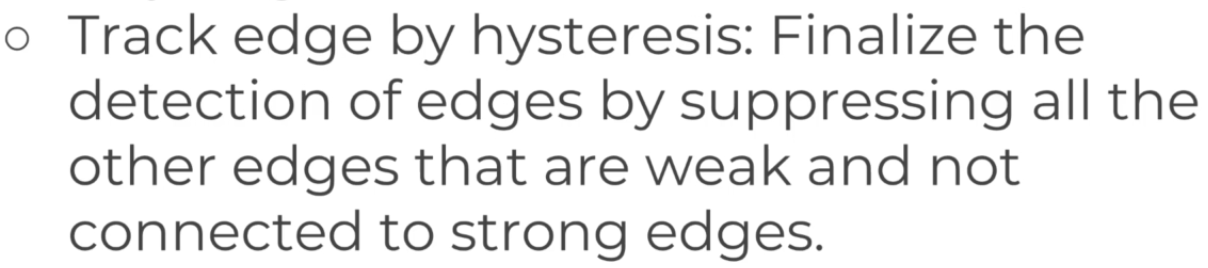

### <center>NOTE<Center/>

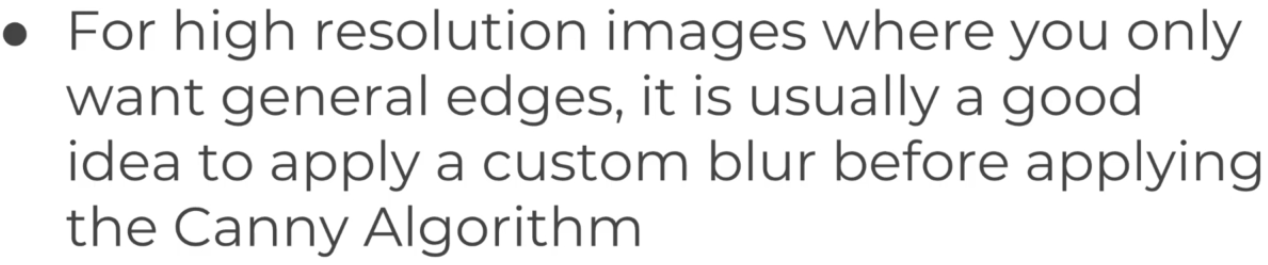

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [7]:
img = cv.imread('../Data/sammy_face.jpg')
# we wont convert colors as we are only concerned with edges.

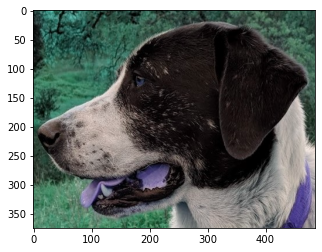

In [10]:
plt.imshow(img)

# cv::Canny
$$cv.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) ->edges$$
$$cv.Canny(dx, dy, threshold1, threshold2[, edges[, L2gradient]]) ->edges$$
* **image** 8-bit input image.
* **edgesoutput** edge map; single channels 8-bit image, which has the same size as image .
* **threshold1first** threshold for the hysteresis procedure.
* **threshold2second** threshold for the hysteresis procedure.
* **apertureSizeaperture** size for the Sobel operator.
* **L2gradienta** flag, indicating whether a more accurate L2 norm =âˆš(dI/dx)2+(dI/dy)2 should be used to calculate the image gradient magnitude ( L2gradient=true ), or whether the default L1 norm =|dI/dx|+|dI/dy| is enough ( L2gradient=false ).

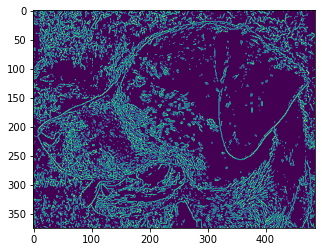

In [12]:
canny = cv.Canny(img,threshold1 = 127,threshold2 = 127)
plt.imshow(canny)

* We can observe that the ear and nose and head part is detected properly but there is too much noise in the picture.
* We can blur the image to get rid of noise and get smooth edges OR we can play with different values of threshold.

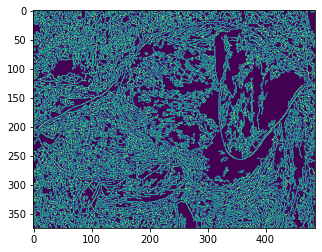

In [13]:
canny = cv.Canny(img,threshold1 = 0,threshold2 = 127)
plt.imshow(canny)

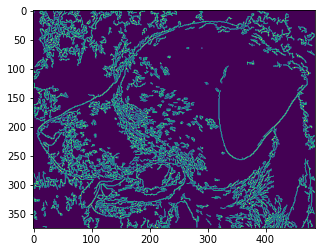

In [25]:
canny = cv.Canny(img,threshold1 = 100,threshold2 = 255)
plt.imshow(canny)

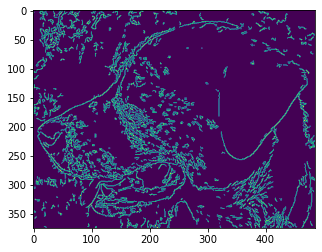

In [26]:
canny = cv.Canny(img,threshold1 = 150,threshold2 = 255)
plt.imshow(canny)

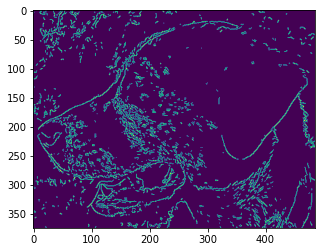

In [28]:
canny = cv.Canny(img,threshold1 = 200,threshold2 = 255)
plt.imshow(canny)

* We will try a formula for canny provided by someone on StackOverflow
* https://stackoverflow.com/questions/25125670/best-value-for-threshold-in-canny

In [29]:
# Calculate the median pixel value
med_val = np.median(img) 

In [30]:
# Lower bound is either 0 or 70% of the median value, whicever is higher
lower = int(max(0, 0.7* med_val))
# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))

* We will just change the upper limit experimenting with it.

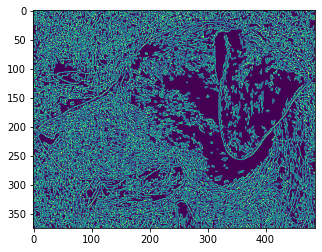

In [31]:
canny = cv.Canny(img,threshold1 = lower,threshold2 = upper+50)
plt.imshow(canny)

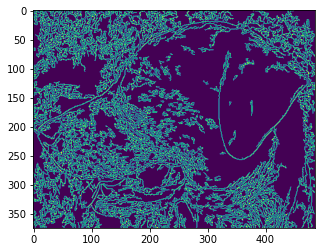

In [32]:
canny = cv.Canny(img,threshold1 = lower,threshold2 = upper+150)
plt.imshow(canny)

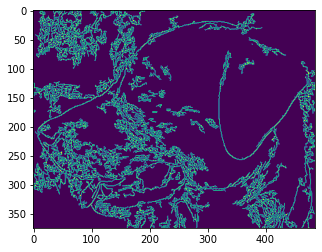

In [36]:
canny = cv.Canny(img,threshold1 = lower,threshold2 = upper+300)
plt.imshow(canny)

* The major thing that help in edge detection is blurring image.

# Trying CV::BLUR

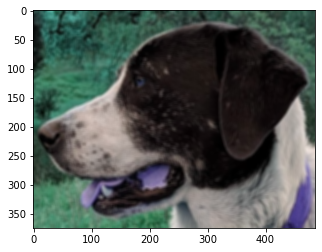

In [59]:
bimg = cv.blur(img,(6,6))
plt.imshow(bimg)

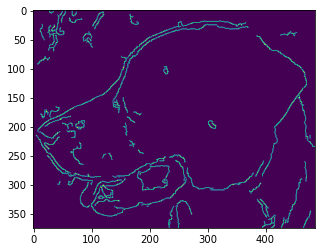

In [60]:
canny = cv.Canny(bimg,threshold1 = lower,threshold2 = upper+60)
plt.imshow(canny)

# Trying CV::GAUSSIANBLUR

In [68]:
gbimg = cv.GaussianBlur(img,(5,5),sigmaX = 10,sigmaY = 10)

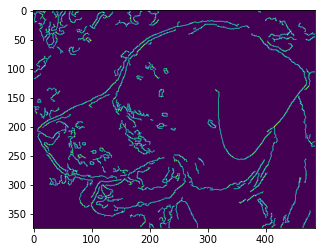

In [71]:
canny = cv.Canny(gbimg,threshold1 = lower,threshold2 = upper+60)
plt.imshow(canny)

# Trying CV::MEDIANBLUR

In [74]:
mbimg = cv.medianBlur(img,9)

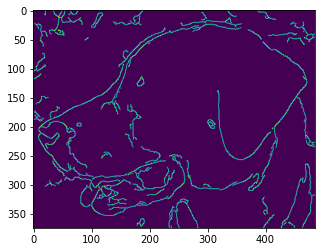

In [75]:
canny = cv.Canny(mbimg,threshold1 = lower,threshold2 = upper+60)
plt.imshow(canny)